In [2]:
import pickle

# Load the augmented images and labels from the file
with open('../local_data/data_useable_2.pickle', 'rb') as f:
    augmented_images, augmented_labels = pickle.load(f)

In [9]:
augmented_images.shape, augmented_labels.shape

((2200, 512, 512, 3), (2200, 2))

In [4]:
import tensorflow as tf
import numpy as np

augmented_images = np.array(augmented_images, dtype=np.float32)
augmented_labels = np.array(augmented_labels, dtype=np.int32)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

In [5]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1760, 512, 512, 3), (1760, 2), (440, 512, 512, 3), (440, 2))

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Normalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = keras.applications.InceptionV3(input_shape=(512, 512, 3), include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output
x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)

x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)
x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = [ModelCheckpoint(filepath='../models/pre_model_2_7.keras', monitor='val_loss', mode='min', save_best_only=True)]

history = model.fit(
  X_train,
  y_train, 
  epochs=5, 
  batch_size=32,
  validation_data=(X_val, y_val),
  callbacks=callbacks
  )

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.6863 - loss: 0.6727 - val_accuracy: 0.8159 - val_loss: 0.4220
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.8616 - loss: 0.3083 - val_accuracy: 0.8159 - val_loss: 0.4726
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.9229 - loss: 0.1835 - val_accuracy: 0.8477 - val_loss: 0.4103
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.9663 - loss: 0.0927 - val_accuracy: 0.8636 - val_loss: 0.4102
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.9964 - loss: 0.0273 - val_accuracy: 0.8545 - val_loss: 0.5069


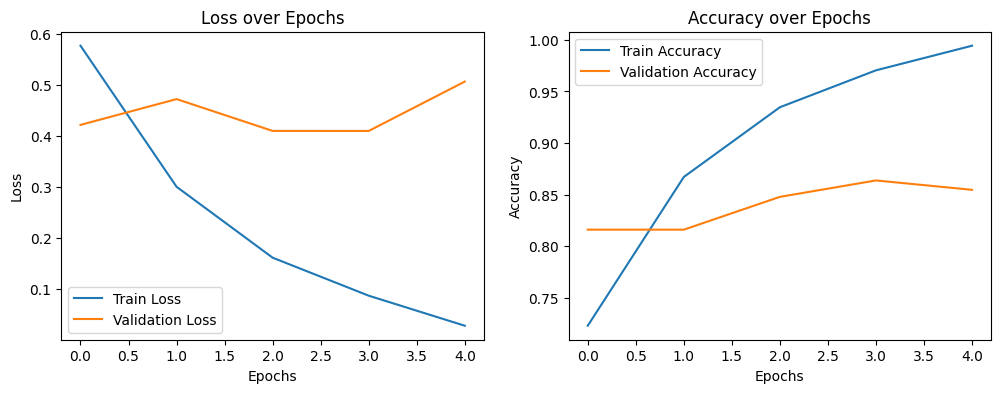

In [18]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

In [19]:
model.save('../models/pre_model_2_7.h5')